In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
test_df=pd.read_csv("Data/Preprocessed/Rockburst_test_data.csv")

In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Duration_days                19 non-null     float64
 1   Energy_Unit_log              19 non-null     float64
 2   Energy_density_Joule_sqr     19 non-null     float64
 3   Volume_m3_sqr                19 non-null     float64
 4   Event_freq_unit_per_day_log  19 non-null     float64
 5   Energy_Joule_per_day_sqr     19 non-null     float64
 6   Volume_m3_per_day_sqr        19 non-null     float64
 7   Energy_per_Volume_log        19 non-null     float64
 8   Intensity_Level_encoded      19 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 1.5 KB


In [49]:
test_df.head(19)

,Duration_days,Energy_Unit_log,Energy_density_Joule_sqr,Volume_m3_sqr,Event_freq_unit_per_day_log,Energy_Joule_per_day_sqr,Volume_m3_per_day_sqr,Energy_per_Volume_log,Intensity_Level_encoded
0,5.0,2.484907,16.892100,13.133376,1.163151,11.634921,8.555625,1.395086,3
1,4.0,1.945910,28.090000,7.480225,0.916291,22.071204,4.549689,1.161207,0
2,13.0,2.197225,17.073424,12.278016,0.479335,9.108324,5.712100,1.188790,1
3,7.0,1.386294,25.603600,19.695844,0.356975,17.766225,12.909649,0.516398,2
4,9.0,2.890372,22.600516,19.333609,1.060910,14.440000,11.854249,1.582328,2
5,9.0,2.484907,16.232841,24.443136,0.798408,9.455625,15.920100,1.170908,1
6,4.0,1.098612,1.464100,17.189316,0.405465,0.369664,12.559936,0.393657,0
7,6.0,1.945910,30.924721,16.345849,0.693147,22.877089,10.660225,0.909889,1
8,4.0,3.912023,41.203561,24.950025,1.931159,31.866025,17.792368,2.380454,3
9,11.0,3.044522,31.236921,21.058921,1.036027,20.684304,12.581209,1.678637,2


In [50]:
train_df=pd.read_csv("Data/Preprocessed/Rockburst_in_Tunnel_V3.csv")

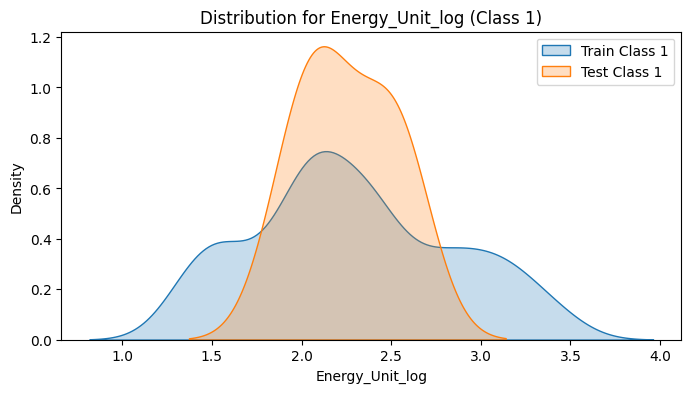

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

feature = "Energy_Unit_log"  # Example feature
plt.figure(figsize=(8,4))
sns.kdeplot(train_df[train_df["Intensity_Level_encoded"]==1][feature], label="Train Class 1", fill=True)
sns.kdeplot(test_df[test_df["Intensity_Level_encoded"]==1][feature], label="Test Class 1", fill=True)
plt.legend()
plt.title(f"Distribution for {feature} (Class 1)")
plt.show()


In [52]:
xgb_model, train_features = joblib.load("trained_models/XGBoost_model_V3.pkl")
scaler=joblib.load("trained_models/scaler_V3.pkl")
# Ensure test features in same order
X_test = test_df[train_features]  
y_test=test_df["Intensity_Level_encoded"]



In [53]:
train_features

['Duration_days',
 'Energy_Unit_log',
 'Energy_density_Joule_sqr',
 'Volume_m3_sqr',
 'Event_freq_unit_per_day_log',
 'Energy_Joule_per_day_sqr',
 'Volume_m3_per_day_sqr',
 'Energy_per_Volume_log']

In [54]:
X_test_scaled = scaler.transform(X_test)  # No fit here!


In [55]:
y_pred=xgb_model.predict(X_test_scaled)

Accuracy: 0.6842
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.50      0.40      0.44         5
           2       0.80      0.80      0.80         5
           3       1.00      0.50      0.67         2

    accuracy                           0.68        19
   macro avg       0.74      0.64      0.67        19
weighted avg       0.69      0.68      0.67        19



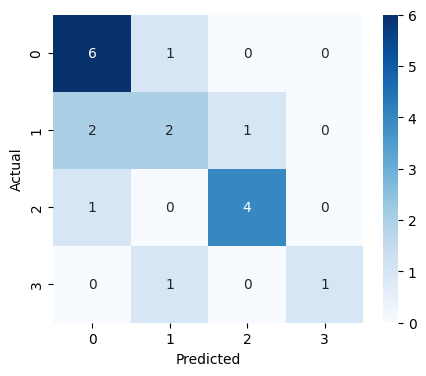

In [56]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 4))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()